# Twitter Sentiment Analysis

Binance Smart Chain (BSC), the layer 1, or base, blockchain of crypto exchange Binance, announced a major rebranding and a push towards expansion. BSC is rebranding to BNB Chain, which stands for Build and Build, in an effort to draw a connection to Binance’s BNB token. Link to full article and tutorial for this project.

Analyzing of the twitter sentiment for the BNBChain:

### Importing Libraries required for this project

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import tweepy
from textblob import TextBlob
import datetime
from datetime import date
plt.style.use('Solarize_Light2')

### Storing and Importing credentials from Twitter Dev page

Importing the credentials from csv file using pandas

In [107]:
log = pd.read_csv('login1.csv')


Reading the credentials from csv to the dataframe:

In [108]:
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

### Autheticating and setting up the API

Create the authentication object

In [109]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

Set the access token and the access token secret

In [110]:
authenticate.set_access_token(accessToken, accessTokenSecret)

Create an API object

In [111]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

### Collecting Tweets

Collecting and gathering tweets about 'token' and filtering out any retweets 'RT' and creating a cursor object for the tweets from the last 7 days:

In [112]:
search_term = '#BNBChain -filter:retweets'
today = date.today()

tweets = tweepy.Cursor(api.search_tweets, q=search_term, lang='en',until = today , tweet_mode='extended').items(2000)
all_tweets = [tweet.full_text for tweet in tweets]

### Importing collected tweets into pandas dataframe:

Collecting and gathering tweets and creating a dataframe to store and display the first five rows of the tweet

In [113]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(5)

,Tweets
0,@kundunsan @shield2protocol \n$SHIELD \n\n@ber...
1,"@mjackswap a really nice project, the blockcha..."
2,"a really nice project, the blockchain technolo..."
3,@mjackswap Wow sir what a good project.\n@Akas...
4,Soon will be listing 🤞\n\n#Mercor $MRCR #MRCR ...


### Cleaning the Tweets:

Creating a function to clean the tweets:

In [114]:
def cleanTwt(twt):
    twt = re.sub('#bitcoin','bitcoin',twt) #removes the '#' from bitcoin
    twt = re.sub('#bitcoin','Bitcoin',twt) #removes the # from Bitcoin
    twt = re.sub('#[A-Za-z0-0]+','',twt) #Removes any strings with a '#'
    twt = re.sub('\\n','',twt) #Removes the '\n' string
    twt = re.sub('\\\n','',twt) #Removes the '\n' string
    twt = re.sub('https?:\/\/S+', '', twt) #Removes any hyperlinks
    twt = re.sub('u"\U0001F600-\U0001F64F', '', twt)# emoticons
    
    return twt

Calling the cleaned tweets into the dataframe:

In [115]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

In [116]:
def remove_emojis(twt):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', twt)

In [117]:
df['Final_Tweets'] = df['Cleaned_Tweets'].apply(remove_emojis)
df = df.drop(columns=['Tweets', 'Cleaned_Tweets'])
df.head()

,Final_Tweets
0,@kundunsan @shield2protocol $SHIELD @berry_dat...
1,"@mjackswap a really nice project, the blockcha..."
2,"a really nice project, the blockchain technolo..."
3,@mjackswap Wow sir what a good project.@Akashg...
4,Soon will be listing $MRCR https://t.co/U...


### Extracting Subjectivity and Polarity scores:

Create a function to get the subjectivity

In [118]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

Create a function to get the polarity

In [119]:
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

### Displaying the score into the dataframe columns:

In [120]:
df['Subjectivity'] = df['Final_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Final_Tweets'].apply(getPolarity)

df.head()

,Final_Tweets,Subjectivity,Polarity
0,@kundunsan @shield2protocol $SHIELD @berry_dat...,0.000000,0.000000
1,"@mjackswap a really nice project, the blockcha...",0.583333,0.596667
2,"a really nice project, the blockchain technolo...",0.583333,0.596667
3,@mjackswap Wow sir what a good project.@Akashg...,0.800000,0.400000
4,Soon will be listing $MRCR https://t.co/U...,0.000000,0.000000


### Setting up sentiment scores:

Creating a function to get the sentiment text/scores:

In [121]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Setting up a column to display the sentiments:

In [122]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head()

,Final_Tweets,Subjectivity,Polarity,Sentiment
0,@kundunsan @shield2protocol $SHIELD @berry_dat...,0.000000,0.000000,Neutral
1,"@mjackswap a really nice project, the blockcha...",0.583333,0.596667,Positive
2,"a really nice project, the blockchain technolo...",0.583333,0.596667,Positive
3,@mjackswap Wow sir what a good project.@Akashg...,0.800000,0.400000,Positive
4,Soon will be listing $MRCR https://t.co/U...,0.000000,0.000000,Neutral


In [123]:
df.describe()

,Subjectivity,Polarity
count,815.000000,815.000000
mean,0.438719,0.338032
std,0.308062,0.312069
min,0.000000,-0.500000
25%,0.179167,0.000000
50%,0.497917,0.333333
75%,0.650000,0.566667
max,1.000000,1.000000


### Plotting

Creating a scatter plot to show the subjectivity and the polarity:

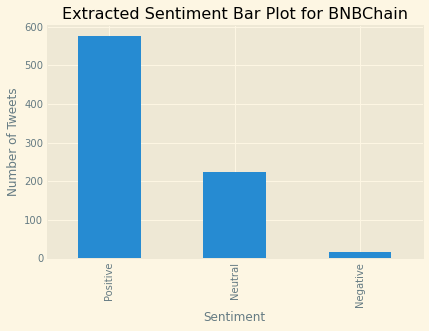

In [126]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Extracted Sentiment Bar Plot for BNBChain')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

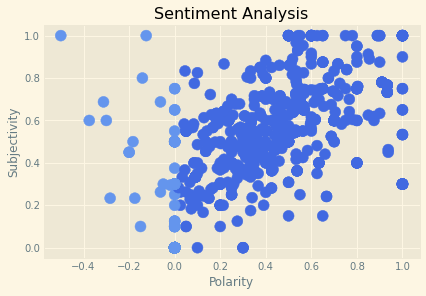

In [125]:
    colors = np.where(df.Sentiment == 'Positive','royalblue','cornflowerblue')
    plt.scatter(df.Polarity, df.Subjectivity, s=120, color= colors)
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()